In [4]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [5]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
type(X_train)

numpy.ndarray

In [8]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Training data -> 60,000

Test data -> 10,000

image dimension -> 28 x 28

grayscale images -> 1 channel


In [9]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [10]:
print(X_train[10].shape)

(28, 28)


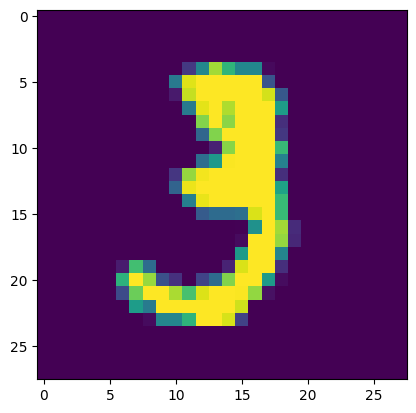

In [13]:
plt.imshow(X_train[10])
plt.show()

In [14]:
Y_train[10]

3

In [16]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [17]:
# Scaling

X_train = X_train/255
X_test = X_test/255

In [18]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:
# Setting up Neural Network

model = Sequential([
                      keras.layers.Flatten(input_shape=(28,28)),
                      keras.layers.Dense(units = 50,activation ='relu'),
                      keras.layers.Dense(units=50,activation='relu'),
                      keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# compiling neural network

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [21]:
# training the model
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8541 - loss: 0.5101
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9569 - loss: 0.1419
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9691 - loss: 0.1002
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0774
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9809 - loss: 0.0634
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9840 - loss: 0.0536
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0443
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9884 - loss: 0.0381
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0325
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0306
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9917 - loss: 0.0274
Epoch 12/20
1875/1875 ━━━━━━━━

Train data accuracy => 99.44%

In [22]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
loss,accuray = model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9684 - loss: 0.1757


In [25]:
print(accuray)

0.9722999930381775


Test data accuracy => 97.22%

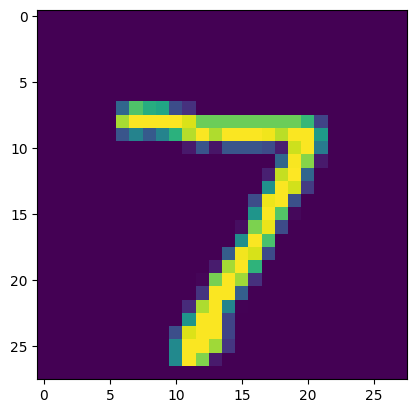

In [31]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [32]:
print(Y_test[0])


7


In [34]:
print(y_pred[0])

[1.6511540e-07 6.8345113e-04 1.2422686e-05 4.2733213e-01 2.3015667e-10
 1.0395772e-06 2.1018750e-20 9.9999988e-01 7.6731317e-07 8.8432521e-01]


In [35]:
# converting the predition probabilities to class label

label1 = np.argmax(y_pred[0])
print(label1)

7


In [39]:
# converting the predition probabilities to class label for all dataset

y_pred_lab = [np.argmax(i) for i in y_pred]

In [40]:
print(y_pred_lab)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [42]:
conf = confusion_matrix(Y_test,y_pred_lab)
print(conf)

tf.Tensor(
[[ 966    0    2    0    1    2    2    1    1    5]
 [   0 1124    5    0    0    1    2    2    0    1]
 [   6    1 1001    5    2    0    3    7    5    2]
 [   1    0    8  982    0    2    0    7    4    6]
 [   3    2    2    0  957    0    5    3    0   10]
 [   3    0    0   15    0  857    7    2    4    4]
 [   5    3    1    1    6    6  935    0    1    0]
 [   0    3    8    3    0    1    0  999    2   12]
 [  10    0    7   10    6    9    4    3  915   10]
 [   1    2    0    3   12    3    2    4    3  979]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

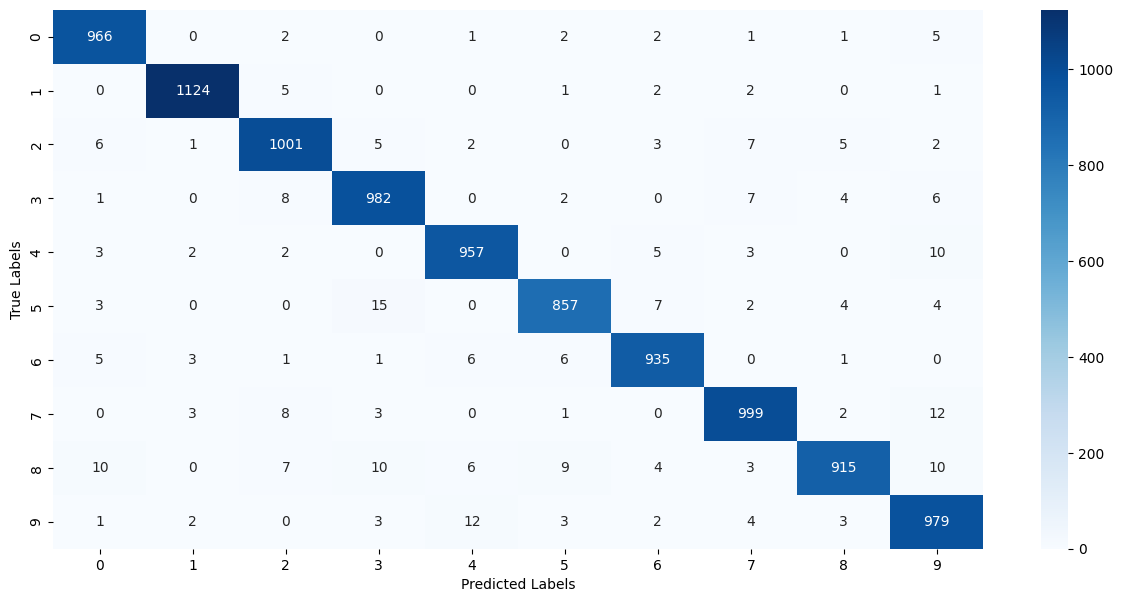

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [45]:
input_image_path = '/content/MNIST_digit.png'

In [46]:
input_image = cv2.imread(input_image_path)

In [47]:
type(input_image)

numpy.ndarray

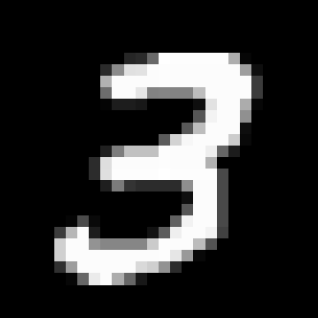

In [49]:
cv2_imshow(input_image)

In [50]:
input_image.shape

(318, 318, 3)

In [51]:
# Conversion to GrayScale image

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [52]:
grayscale.shape

(318, 318)

In [53]:
# resizing the image

input_image_res = cv2.resize(grayscale,(28,28))

In [54]:
input_image_res.shape

(28, 28)

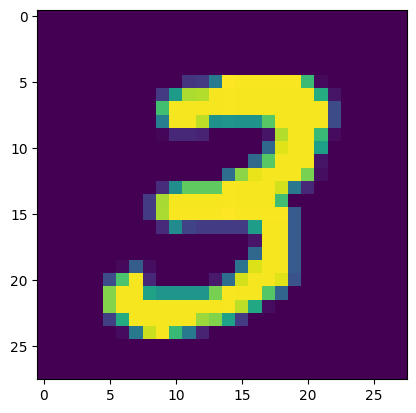

In [55]:
plt.imshow(input_image_res)
plt.show()

In [56]:
cv2_imshow(input_image_res)

In [57]:
print(input_image_res)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 131 133 13

In [58]:
# Scaling

input_image_res = input_image_res/255

In [59]:
print(input_image_res)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [61]:
type(input_image_res)

numpy.ndarray

In [63]:
image_reshaped = np.reshape(input_image_res,[1,28,28])

In [65]:
print(image_reshaped)

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [67]:
input_pred = model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [68]:
print(input_pred)

[[1.94413414e-13 6.88593493e-09 3.20211276e-02 1.00000000e+00
  1.21859606e-32 8.23703999e-07 1.83626470e-32 1.02654531e-06
  2.74888845e-03 3.91747086e-11]]


In [70]:
input_lab = np.argmax(input_pred)

In [71]:
print(input_lab)

3


# **Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


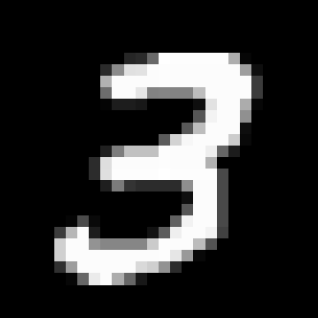

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The Handwritten Digit is recognised as  3


In [82]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_img_resize = cv2.resize(grayscale,(28,28))

input_img_scaling = input_img_resize/255

image_reshape = np.reshape(input_img_scaling,(1,28,28))

img_pred = model.predict(image_reshape)

img_label = np.argmax(img_pred)

print('The Handwritten Digit is recognised as ', img_label)